## Hausaufgabe 6

#### **Abgabe** <br> 24.06. 12:00 Uhr (via studIP) 
#### **Verteidigung** <br> 27.06. 08:00-11:00 Uhr 

Mit jedem Blatt können **maximal** 5 Prozentpunkte Bonus für die Klausur erreicht werden, falls:
1) mind. 60% des Arbeitsblattes korrekt bearbeitet wurden 
2) das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.

*Rahmenbedingungen*:
- Jede Gruppe muss sich bei studIP für einen Slot zur Verteidigung registrieren.
- Erfolgreiche Verteidigung bedeutet, dass ein von uns ausgewähltes Team-Mitglied die Lösung erklärt und Fragen dazu beantwortet.
- ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
- Der Code muss ohne Hilfsmittel erläutert werden.
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Jede Gruppe gibt nur eine Lösung als Zip-Datei ab, die mit dem Namen und der Matrikelnummer eines Mitglieds versehen ist. Also z.B. `mustermann_12345678.zip` 

## Aufgabe 1 (10%)

Laden Sie das Titanic Dataset als Pandas DataFrame. Beantworten Sie folgende Fragen, indem Sie den Pandas Dataframe mit geeigneten Funktionen und Transformationen bearbeiten:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


#### 1) (5%) Was ist der durchschnittliche Ticketpreis je Klasse? Erstellen Sie zunächst einen Barplot mit `seaborn`, bestimmen Sie anschließend den Durchschnittswert mit der `.groupby`-Methode und fügen Sie diesen Wert dem jeweiligen Balken im Plot hinzu.

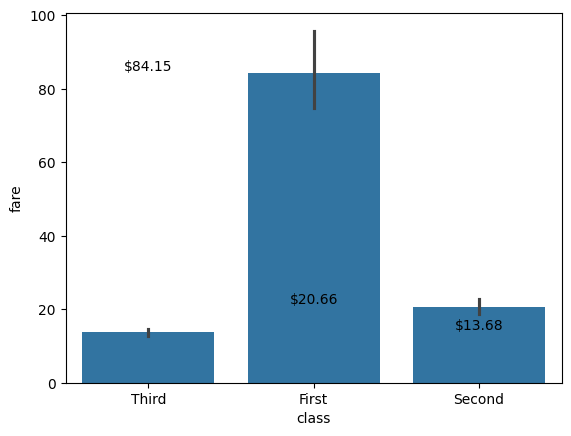

In [33]:
# Create a bar plot
sns.barplot(data=df, x='class', y='fare')

# Calculate the average ticket price per class
average_fare = df.groupby('class')['fare'].mean()

# Add the average fare values to the plot
for i, fare in enumerate(average_fare):
    plt.text(i, fare, f'${fare:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

#### 2) (5%) Was ist der Median des Ticketpreises je Klasse? Gehen Sie genauso vor wie in der vorherigen Aufgabe und erklären Sie den Unterschied zwischen Durchschnitt und Median anhand Ihrer Ergebnisse.
<br> *Hinweis: `sns.barplot()` hat ein Argument `estimator`, das nützlich sein könnte.*

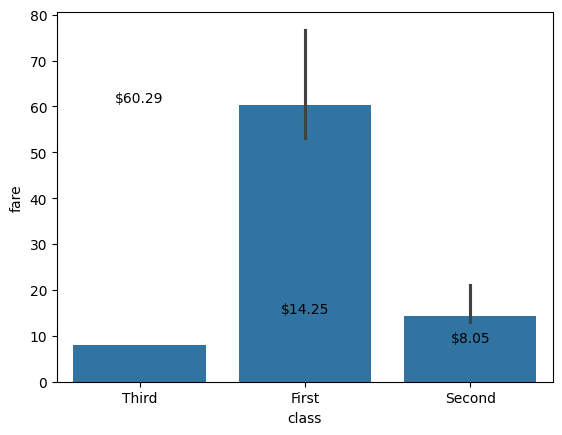

In [34]:
# Calculate the median ticket price per class
median_fare = df.groupby('class')['fare'].median()

# Create a bar plot
sns.barplot(data=df, x='class', y='fare', estimator=np.median)

# Add the median fare values to the plot
for i, fare in enumerate(median_fare):
    plt.text(i, fare, f'${fare:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

---

## Aufgabe 2 (40%)

#### 1. (10%) Definieren Sie mit dem package `scipy` eine Gaussverteilung mit Erwartungswert 10 and Standardabweichung 3 und ziehen Sie aus dieser Verteilung n = [100, 1000, 10000] Stichproben. Plotten Sie diese Stichproben-Verteilungen als Histogramme in einer 3-teiligen Figure. Plotten Sie dann auf die Histogramme die PDF der Verteilung. 

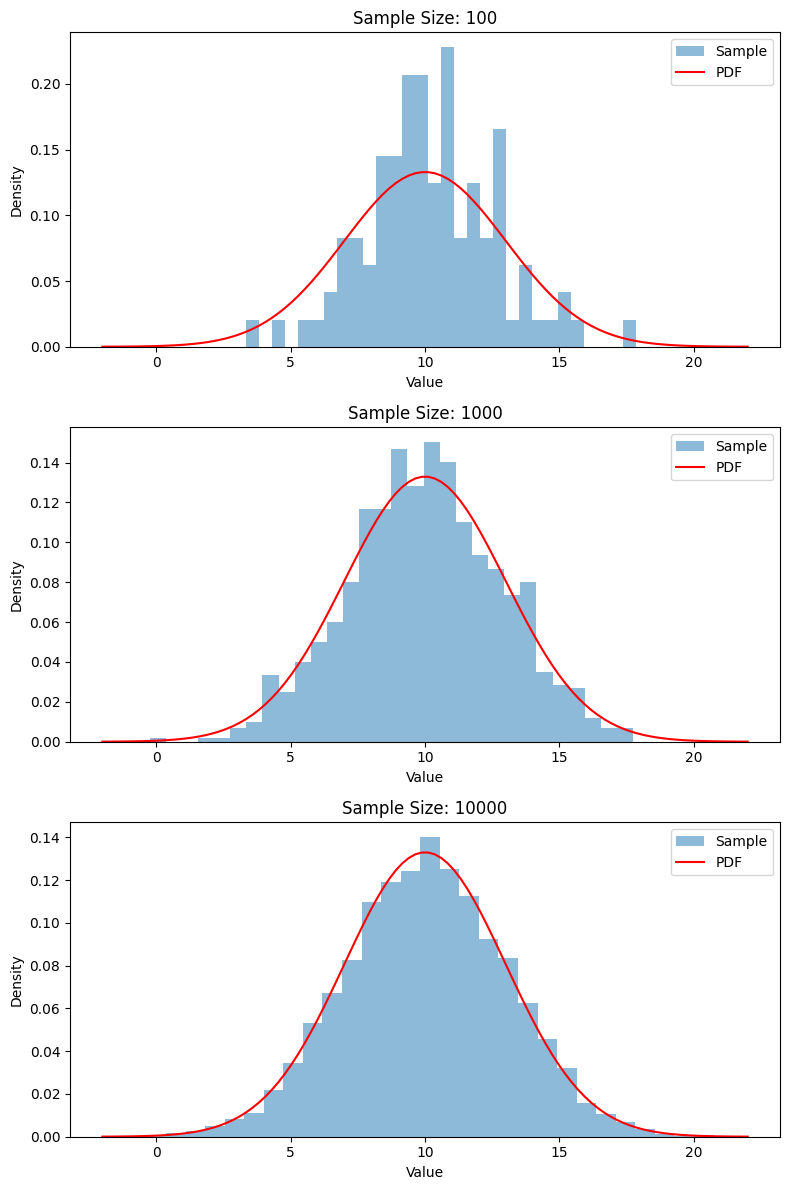

In [35]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Define the parameters of the Gaussian distribution
mean = 10
std_dev = 3

# Draw samples from the Gaussian distribution
sample_sizes = [100, 1000, 10000]
samples = [np.random.normal(mean, std_dev, size) for size in sample_sizes]

# Create a 3x1 subplot figure
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the histograms of the samples
for i, sample in enumerate(samples):
    axs[i].hist(sample, bins=30, density=True, alpha=0.5, label='Sample')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Sample Size: {sample_sizes[i]}')

    # Plot the PDF of the Gaussian distribution
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
    y = norm.pdf(x, mean, std_dev)
    axs[i].plot(x, y, 'r-', label='PDF')
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### 2. (5%) Was ist der Unterschied zwischen der Standardabweichung der Stichprobenverteilung und der Standardabweichung der zugrundeliegenden Gaussverteilung? Erklären Sie, wie sich dieser Unterschied in Ihren empirischen Ergebnissen zeigt. 

Die **Standardabweichung der zugrundeliegenden Verteilung (\(\sigma\))** beschreibt die Streuung der Daten in der gesamten Population.

Die **Standardabweichung der Stichprobenverteilung (\(\sigma_{\bar{x}}\))**, auch **Standardfehler des Mittelwerts**, zeigt, wie stark die Mittelwerte vieler Stichproben um den wahren Mittelwert streuen. Sie berechnet sich als:

\[ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \]

Hierbei ist \(n\) die Stichprobengröße.

### Empirischer Unterschied:
- **\(\sigma\)**: Misst, wie weit die einzelnen Datenpunkte vom Durchschnitt abweichen.
- **\(\sigma_{\bar{x}}\)**: Misst, wie weit die Mittelwerte der Stichproben vom Durchschnitt abweichen. Dieser Wert ist kleiner und zeigt, dass Mittelwerte von Stichproben weniger streuen als die Einzelwerte in der Grundgesamtheit, insbesondere bei großen Stichproben.

### Anwendung:
Wenn Sie aus einer Population mit \(\sigma = 10\) Stichproben der Größe \(n = 100\) ziehen, beträgt der Standardfehler \(\sigma_{\bar{x}} = 1\). Das bedeutet, die Mittelwerte dieser Stichproben streuen weniger (mit Standardabweichung 1) um den wahren Mittelwert als die Einzelwerte (mit Standardabweichung 10).

#### 3. (10%) Laden Sie den numpy array `sample.npy`. Berechnen Sie das 95% Konfidenzintervall für den Mittelwert via Bootstrapping und vergleichen Sie ihn mit dem empirischen Wert.

In [36]:
import numpy as np

# Load the numpy array
sample = np.load('sample.npy')

# Number of bootstrap samples
num_samples = 1000

# Bootstrap resampling
bootstrap_samples = np.random.choice(sample, size=(num_samples, len(sample)), replace=True)

# Calculate the mean of each bootstrap sample
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calculate the lower and upper bounds of the confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Calculate the empirical mean
empirical_mean = np.mean(sample)

# Print the confidence interval and empirical mean
print(f'95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]')
print(f'Empirical Mean: {empirical_mean:.2f}')

95% Confidence Interval: [4.93, 6.03]
Empirical Mean: 5.51


#### 4. (15%) Die Null Hypothese ist nun, dass der Mittelwert gleich 5 ist. Die Alternative Hypothese ist, dass er ungleich 5 ist. Würden Sie die Null Hypothese verwerfen? Nutzen Sie Bootstrapping.

In [37]:
# Bootstrap-Verfahren
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Konfidenzintervall berechnen
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Nullhypothese überprüfen
if lower_bound <= mean <= upper_bound:
    print("Die Nullhypothese kann nicht verworfen werden.")
else:
    print("Die Nullhypothese wird verworfen.")

Die Nullhypothese wird verworfen.


## Aufgabe 3 (50%)

#### Wir wollen wissen, ob die Gruppen in diesem Tutorat gleich viel Zeit benötigen, um die Hausaufgaben zu lösen. Dazu wir haben wir von 2 der Gruppen die Zeiten über das Semester hinweg gemessen: 

gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Nutzen Sie in dieser Aufgabe ein Signifikanzniveau von 0.05. Sie können alle Hypothesentests mit Hilfe von `scipy` durchführen. 

In [39]:
gruppe1 = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
gruppe2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

#### 1. (5%) Was ist H0 und H1? Sind die Gruppen unabhängig oder abhängig (paired vs. unpaired)

H0 und H1 stehen für Nullhypothese und Alternativhypothese. In der Statistik werden diese Hypothesen aufgestellt, um eine Aussage über eine Population oder ein Phänomen zu treffen.

Die Nullhypothese (H0) ist die Annahme, dass es keinen signifikanten Unterschied oder keine signifikante Beziehung zwischen den untersuchten Variablen gibt. Sie wird oft als die "Standardannahme" betrachtet und wird in der Regel widerlegt, wenn die vorliegenden Daten ausreichend starke Evidenz für die Alternativhypothese liefern.

Die Alternativhypothese (H1) ist die gegenteilige Annahme zur Nullhypothese. Sie besagt, dass es einen signifikanten Unterschied oder eine signifikante Beziehung zwischen den Variablen gibt. Die Alternativhypothese wird unterstützt, wenn die vorliegenden Daten ausreichend starke Evidenz gegen die Nullhypothese liefern.

Die Frage, ob die Gruppen unabhängig oder abhängig sind, bezieht sich auf das Design der Studie und die Art der Daten, die gesammelt wurden.

Unabhängige Gruppen (unpaired) sind Gruppen, in denen die Beobachtungen in einer Gruppe keine Auswirkungen auf die Beobachtungen in der anderen Gruppe haben. Zum Beispiel, wenn zwei verschiedene Gruppen von Personen verglichen werden, wie Männer und Frauen, und die Daten in den beiden Gruppen unabhängig voneinander gesammelt wurden.

Abhängige Gruppen (paired) sind Gruppen, in denen die Beobachtungen in einer Gruppe mit den Beobachtungen in der anderen Gruppe verbunden sind. Zum Beispiel, wenn die gleichen Personen vor und nach einer Intervention gemessen werden, oder wenn Paare von Personen mit ähnlichen Merkmalen gebildet werden und die Daten innerhalb der Paare verglichen werden.

Die Entscheidung, ob die Gruppen unabhängig oder abhängig sind, hängt von der spezifischen Forschungsfrage und dem Design der Studie ab.

#### 2. Testen Sie die Daten auf folgende Annahmen. Nutzen Sie auch hierfür eigene geeignete Hypothesentests.

##### a) (15%) Die Datensätze beider Gruppen folgen einer Normalverteilung 

In [40]:
from scipy.stats import shapiro

# Assuming group1 and group2 are the datasets of the two groups
statistic1, p_value1 = shapiro(gruppe1)
statistic2, p_value2 = shapiro(gruppe2)

# Check the p-values
alpha = 0.05  # significance level
if p_value1 > alpha and p_value2 > alpha:
    print("Both groups follow a normal distribution")
else:
    print("At least one group does not follow a normal distribution")

At least one group does not follow a normal distribution


##### b) (15%) Die Datensätze beider Gruppen haben die gleiche STD (iid. data)

In [ ]:
from scipy.stats import levene

# Levene-Test
statistic, p_value = levene(gruppe1, gruppe2)

# Ausgabe des Testergebnisses
if p_value > 0.05:
    print("Die Datensätze haben die gleiche Standardabweichung.")
else:
    print("Die Datensätze haben unterschiedliche Standardabweichungen.")

#### 3. (15%) Aufgrund der Ergebnise aus 1. und 2., welche Art von Hypothesentest brauchen Sie für diese Aufgabe? Führen Sie den Test durch.

---